In [36]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

#http://rstudio-pubs-static.s3.amazonaws.com/373547_be9bd698f39f486fb71b15a45fa03e34.html
#https://www.datacamp.com/community/tutorials/wordcloud-python

url = "https://raw.githubusercontent.com/mikeasilva/data-scientist-skills/master/raw_skills.csv"
df = pd.read_csv(url)

df

,id,raw_skills,url
0,1,"['natural language', ' artificial intelligence...",https://www.dice.com/jobs/detail/Data-Scientis...
1,2,"['analyst', ' database', ' developer', ' infor...",https://www.dice.com/jobs/detail/Data-Engineer...
2,3,"['data analytics', ' data mining and statistic...",https://www.dice.com/jobs/detail/Data-Scientis...
3,4,"['data science', ' machine learning', ' python...",https://www.dice.com/jobs/detail/Senior-Data-S...
4,5,"['analysis', ' change management', ' consultin...",https://www.dice.com/jobs/detail/Data-Scientis...
...,...,...,...
448,449,"['data analysis', ' data modeling', ' sql serv...",https://www.dice.com/jobs/detail/Data-Scientis...
449,450,"['data scientist ', ' quantitative analyst']",https://www.dice.com/jobs/detail/Quant-Analyst...
450,451,[''],https://www.dice.com/jobs/detail/Data-Engineer...
451,452,"['analytical techniques', ' data manipulation/...",https://www.dice.com/jobs/detail/Data-Scientis...


In [37]:
df['raw_skills_words'] = df['raw_skills']
bad_chars = ["'", ',', '[', "]"]

for i in bad_chars :
    df['raw_skills_words'] = df['raw_skills_words'].map(lambda x: x.replace(i, ''))
df

,id,raw_skills,url,raw_skills_words
0,1,"['natural language', ' artificial intelligence...",https://www.dice.com/jobs/detail/Data-Scientis...,natural language artificial intelligence mac...
1,2,"['analyst', ' database', ' developer', ' infor...",https://www.dice.com/jobs/detail/Data-Engineer...,analyst database developer informatica lif...
2,3,"['data analytics', ' data mining and statistic...",https://www.dice.com/jobs/detail/Data-Scientis...,data analytics data mining and statistical an...
3,4,"['data science', ' machine learning', ' python...",https://www.dice.com/jobs/detail/Senior-Data-S...,data science machine learning python tensor...
4,5,"['analysis', ' change management', ' consultin...",https://www.dice.com/jobs/detail/Data-Scientis...,analysis change management consulting data ...
...,...,...,...,...
448,449,"['data analysis', ' data modeling', ' sql serv...",https://www.dice.com/jobs/detail/Data-Scientis...,data analysis data modeling sql server t-sq...
449,450,"['data scientist ', ' quantitative analyst']",https://www.dice.com/jobs/detail/Quant-Analyst...,data scientist quantitative analyst
450,451,[''],https://www.dice.com/jobs/detail/Data-Engineer...,
451,452,"['analytical techniques', ' data manipulation/...",https://www.dice.com/jobs/detail/Data-Scientis...,analytical techniques data manipulation/wrang...


In [38]:
text = " ".join(str(review) for review in df.raw_skills_words)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 44606 words in the combination of all review.


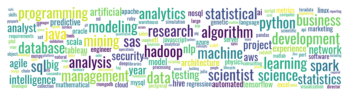

In [39]:
# Generate a word cloud image
wordcloud = WordCloud(width = 1584, height = 396,repeat=True,max_font_size = 70, min_font_size = 15, max_words = 1000 ,font_path='Oswald-VariableFont_wght.ttf',random_state=1,prefer_horizontal = 1, background_color='white', colormap='viridis', collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file('profileBG.png')

In [62]:
keyWordList = []
for i in ['[',']',"'"] :
    df['raw_skills'] = df['raw_skills'].map(lambda x: x.replace(i, ''))
for l in df.raw_skills:
    keyWordList.append(list(l.split(",  ")))
keyWordList = [item for sublist in keyWordList for item in sublist]
keyWordList = list(dict.fromkeys(keyWordList))

file = open(r"KeyWordList.txt","w")
for i in keyWordList:
    file.write(i+"\n") 
file.close()